In [1]:
from clustering_ae import *

In [2]:
import pandas as pd
import numpy as np
from keras.utils import to_categorical


Using TensorFlow backend.


In [3]:
gene_freq_encodings = pd.read_csv("Final_Merged_Gene_Encodings.csv")

In [4]:
gene_freq_encodings.head()

,Unnamed: 0,CancerType,ENSG00000160767,ENSG00000207732,ENSG00000213590,ENSG00000144909,ENSG00000144681,ENSG00000267957,ENSG00000182111,ENSG00000145321,...,ENSG00000131873,ENSG00000271795,ENSG00000172602,ENSG00000234393,ENSG00000145332,ENSG00000227802,ENSG00000047056,ENSG00000198982,ENSG00000159915,ENSG00000141522
0,0,COAD-US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,COAD-US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,COAD-US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,COAD-US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,COAD-US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
shuffled_data = gene_freq_encodings.sample(frac=1)

In [6]:
shuffled_data.head(20)

,Unnamed: 0,CancerType,ENSG00000160767,ENSG00000207732,ENSG00000213590,ENSG00000144909,ENSG00000144681,ENSG00000267957,ENSG00000182111,ENSG00000145321,...,ENSG00000131873,ENSG00000271795,ENSG00000172602,ENSG00000234393,ENSG00000145332,ENSG00000227802,ENSG00000047056,ENSG00000198982,ENSG00000159915,ENSG00000141522
1466,1466,LGG-US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3632,3632,BRCA-US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8033,2046,Healthy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2407,2407,OV-US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3594,3594,UCEC-US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
138,138,GBM-US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8162,2175,Healthy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6399,412,Healthy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1619,1619,COAD-US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1016,1016,BLCA-US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
gene_ids = [col for col in shuffled_data.columns if col.startswith("ENSG")]

In [8]:
datax = shuffled_data[gene_ids].to_numpy()

In [9]:
datax.shape

(8491, 30085)

In [10]:
cancer_types = set(list(shuffled_data["CancerType"]))

In [11]:
cancer_types_dict = {}
for i, ct in enumerate(cancer_types):
    cancer_types_dict[ct] = i

In [12]:
cancer_types_dict

{'SKCM-US': 0,
 'THCA-US': 1,
 'BRCA-US': 2,
 'PRAD-US': 3,
 'LUSC-US': 4,
 'OV-US': 5,
 'UCEC-US': 6,
 'Healthy': 7,
 'LGG-US': 8,
 'BLCA-US': 9,
 'KIRC-US': 10,
 'COAD-US': 11,
 'GBM-US': 12}

In [13]:
datay = [cancer_types_dict[ct] for ct in list(shuffled_data["CancerType"])]

In [14]:
datay_cat = to_categorical(datay)

In [15]:
datay_cat.shape

(8491, 13)

In [16]:
xtrain = datax[:7000]
ytrain = datay_cat[:7000]

xtest = datax[7000:]
ytest = datay_cat[7000:]

In [17]:
from sklearn.decomposition import TruncatedSVD

reducer = TruncatedSVD(n_components=600)

xtrain_reduced = reducer.fit_transform(xtrain)

In [20]:
clustering_ae = ClusteringVAE(xtrain_reduced.shape[1], 3, ytrain.shape[1])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 600)          0                                            
__________________________________________________________________________________________________
enc_hidden (Dense)              (None, 300)          180300      input_2[0][0]                    
__________________________________________________________________________________________________
BN1 (BatchNormalizationV1)      (None, 300)          1200        enc_hidden[0][0]                 
__________________________________________________________________________________________________
A1 (Activation)                 (None, 300)          0           BN1[0][0]                        
__________________________________________________________________________________________________
D1 (Dropou

In [22]:
loss_dict = {
    "ClusterLayer": kullback_leibler_divergence,
    "ae_output": mean_squared_error
}
clustering_ae.compile_and_train(xtrain_reduced, ytrain, Adam(lr=0.0003), 32, 2, loss_dict)

Train on 5600 samples, validate on 1400 samples
Epoch 1/2
5600/5600 [==============================] - 3s 564us/sample - loss: 2.2512 - ae_output_loss: 1.0108 - ClusterLayer_loss: 1.2404 - val_loss: 2.6381 - val_ae_output_loss: 1.2719 - val_ClusterLayer_loss: 1.3663
Epoch 2/2
5600/5600 [==============================] - 2s 395us/sample - loss: 2.2120 - ae_output_loss: 1.0034 - ClusterLayer_loss: 1.2086 - val_loss: 2.6038 - val_ae_output_loss: 1.2532 - val_ClusterLayer_loss: 1.3505


In [23]:
clustering_encoder = clustering_ae.get_encoder_model()

In [24]:
xtrain_embed = clustering_encoder.transform(xtrain_reduced)

In [28]:
from mpl_toolkits.mplot3d import Axes3D

In [30]:
def plot_embeddings_with_legend_3d(mnist_embeddings, labels):
    colors = [
        "tab:blue", "tab:orange", "tab:green", 
        "tab:red", "tab:purple", "tab:brown",
        "tab:pink", "tab:gray", "tab:olive",
        "tab:cyan", "lightcoral", "seagreen",
        "gold", "steelblue", "lawngreen",
        "salmon", "deepskyblue", "darkolivegreen",
        "goldenrod", "rosybrown"
    ]
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(len(list(set(labels)))):
        digits = np.array([mnist_embeddings[j] for j in range(mnist_embeddings.shape[0]) if i == labels[j]])
        ax.scatter(digits[:, 0], digits[:, 1], digits[:, 2], s=5, c=colors[i], label=i, cmap="Spectral")
    ax.legend(prop={"size": 15}, markerscale=3)

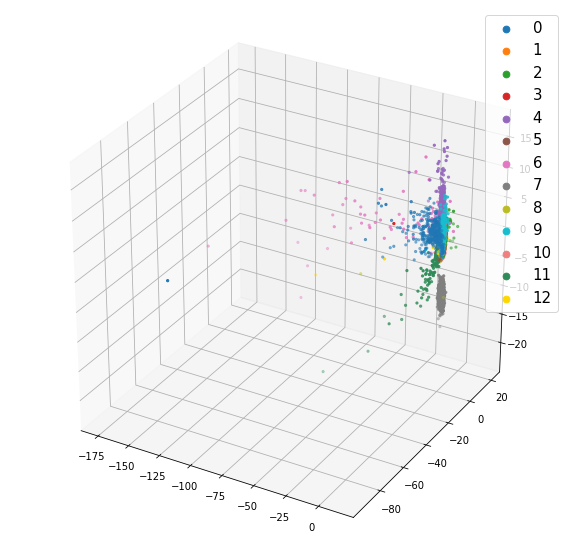

In [31]:
plot_embeddings_with_legend_3d(xtrain_embed, datay[:7000])

In [26]:
xtest_embed = clustering_encoder.transform(reducer.transform(xtest))

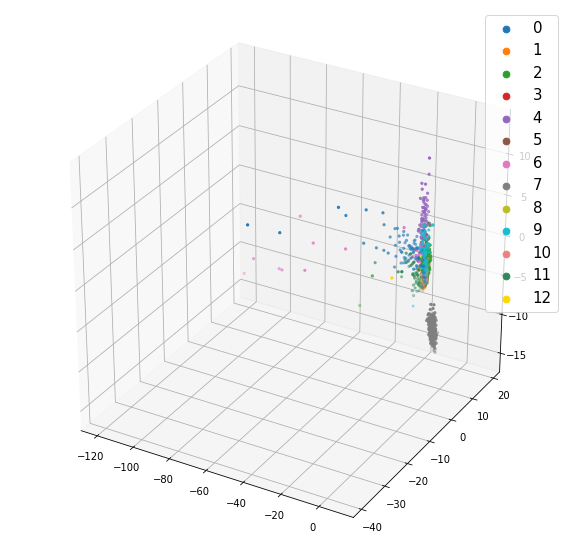

In [32]:
plot_embeddings_with_legend_3d(xtest_embed, datay[7000:])

In [33]:
clustering_encoder.train(xtrain_reduced, ytrain, epochs=10)

Train on 5600 samples, validate on 1400 samples
Epoch 1/10
5600/5600 [==============================] - 2s 409us/sample - loss: 5.4694 - MuLayer_loss: 4.1300 - ClusterLayer_loss: 1.3394 - val_loss: 5.6294 - val_MuLayer_loss: 4.2302 - val_ClusterLayer_loss: 1.3992
Epoch 2/10
5600/5600 [==============================] - 2s 282us/sample - loss: 4.5265 - MuLayer_loss: 3.2514 - ClusterLayer_loss: 1.2751 - val_loss: 4.5518 - val_MuLayer_loss: 3.2281 - val_ClusterLayer_loss: 1.3237
Epoch 3/10
5600/5600 [==============================] - 2s 284us/sample - loss: 4.0684 - MuLayer_loss: 2.8374 - ClusterLayer_loss: 1.2309 - val_loss: 4.1603 - val_MuLayer_loss: 2.8741 - val_ClusterLayer_loss: 1.2863
Epoch 4/10
5600/5600 [==============================] - 2s 281us/sample - loss: 3.7949 - MuLayer_loss: 2.6255 - ClusterLayer_loss: 1.1694 - val_loss: 5.5344 - val_MuLayer_loss: 4.0962 - val_ClusterLayer_loss: 1.4382
Epoch 5/10
5600/5600 [==============================] - 2s 285us/sample - loss: 3.6647 -

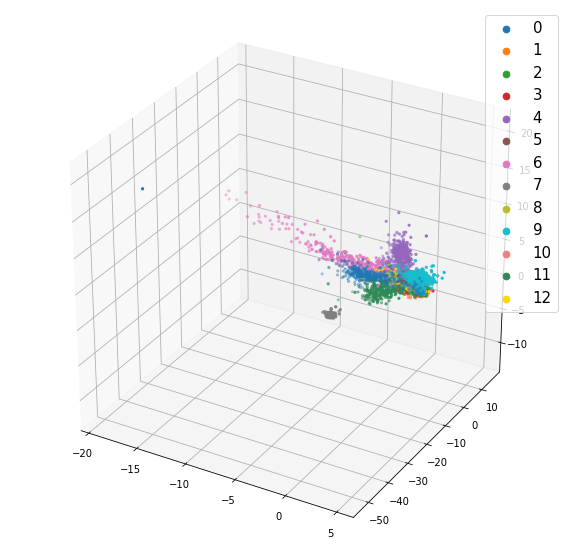

In [34]:
xtrain_embed = clustering_encoder.transform(xtrain_reduced)
plot_embeddings_with_legend_3d(xtrain_embed, datay[:7000])

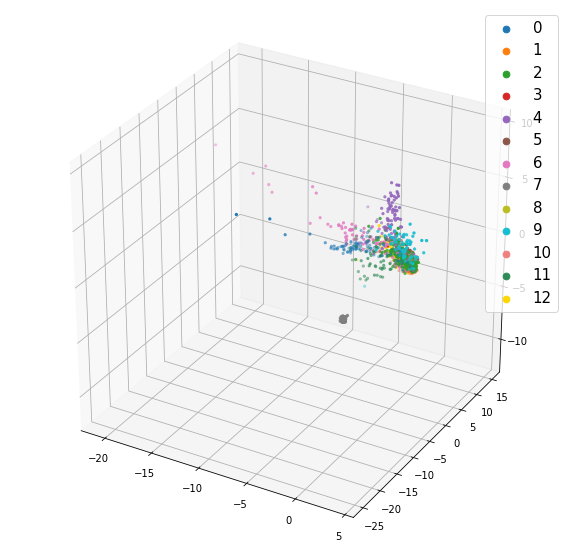

In [35]:
xtest_embed = clustering_encoder.transform(reducer.transform(xtest))
plot_embeddings_with_legend_3d(xtest_embed, datay[7000:])